In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import seaborn as sns
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib as mpl

In [ ]:
pip install mplsoccer

     |████████████████████████████████| 61kB 6.2MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.4-cp37-none-any.whl size=62948 sha256=d498b979b4086af8d52ee582502bc5d26ae7baad95d593e89259154dde8057d7
  Stored in directory: /root/.cache/pip/wheels/12/43/ab/8afa2069f62582a0d06de480f5dfc8d7f284bba4cc31ac366d
Successfully built mplsoccer


In [ ]:
from mplsoccer import Pitch, VerticalPitch

In [ ]:
#Scraping All of Bruno's shots:
base_url = 'https://understat.com/player/'
player = str(input('Please enter the player id: '))
url = base_url+player

Please enter the player id: 1228


In [ ]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [ ]:
#Getting the shot data:
strings = scripts[3].string

In [ ]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

data[:5]

[{'X': '0.730999984741211',
  'Y': '0.5059999847412109',
  'a_goals': '0',
  'a_team': 'Empoli',
  'date': '2014-08-31 19:45:00',
  'h_a': 'h',
  'h_goals': '2',
  'h_team': 'Udinese',
  'id': '41640',
  'lastAction': 'Pass',
  'match_id': '5158',
  'minute': '79',
  'player': 'Bruno Fernandes',
  'player_assisted': 'Cyril Théréau',
  'player_id': '1228',
  'result': 'BlockedShot',
  'season': '2014',
  'shotType': 'RightFoot',
  'situation': 'OpenPlay',
  'xG': '0.03121068701148033'},
 {'X': '0.9569999694824218',
  'Y': '0.6170000076293946',
  'a_goals': '0',
  'a_team': 'Empoli',
  'date': '2014-08-31 19:45:00',
  'h_a': 'h',
  'h_goals': '2',
  'h_team': 'Udinese',
  'id': '41641',
  'lastAction': 'Chipped',
  'match_id': '5158',
  'minute': '82',
  'player': 'Bruno Fernandes',
  'player_assisted': 'Antonio Di Natale',
  'player_id': '1228',
  'result': 'MissedShots',
  'season': '2014',
  'shotType': 'RightFoot',
  'situation': 'OpenPlay',
  'xG': '0.1191796362400055'},
 {'X': '0.7

In [ ]:
df = pd.DataFrame(data)

df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,41640,79,BlockedShot,0.730999984741211,0.5059999847412109,0.03121068701148033,Bruno Fernandes,h,1228,OpenPlay,2014,RightFoot,5158,Udinese,Empoli,2,0,2014-08-31 19:45:00,Cyril Théréau,Pass
1,41641,82,MissedShots,0.9569999694824218,0.6170000076293946,0.1191796362400055,Bruno Fernandes,h,1228,OpenPlay,2014,RightFoot,5158,Udinese,Empoli,2,0,2014-08-31 19:45:00,Antonio Di Natale,Chipped
2,41643,86,SavedShot,0.77,0.5170000076293946,0.037953346967697144,Bruno Fernandes,h,1228,OpenPlay,2014,RightFoot,5158,Udinese,Empoli,2,0,2014-08-31 19:45:00,Panagiotis Kone,Pass
3,41807,47,BlockedShot,0.759000015258789,0.664000015258789,0.018488271161913872,Bruno Fernandes,a,1228,OpenPlay,2014,RightFoot,5110,Juventus,Udinese,2,0,2014-09-13 19:45:00,Antonio Di Natale,LayOff
4,42170,42,BlockedShot,0.754000015258789,0.534000015258789,0.024860931560397148,Bruno Fernandes,h,1228,OpenPlay,2014,LeftFoot,5125,Udinese,Napoli,1,0,2014-09-21 17:00:00,Emmanuel Badu,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,423111,42,SavedShot,0.7430000305175781,0.4540000152587891,0.016029518097639084,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,423114,51,MissedShots,0.7330000305175781,0.4809999847412109,0.05328523367643356,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,423120,66,SavedShot,0.919000015258789,0.8080000305175781,0.06730871647596359,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,423122,73,MissedShots,0.855,0.27100000381469724,0.043396566063165665,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


In [ ]:
filt = ((df['h_team'] == 'Manchester United') | (df['a_team'] == 'Manchester United')) 

df1 = df[filt]

df1

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
156,352577,32,MissedShots,0.7609999847412109,0.21299999237060546,0.01028718426823616,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Victor Lindelöf,HeadPass
157,352580,39,BlockedShot,0.7859999847412109,0.5820000076293945,0.02600577287375927,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Anthony Martial,Pass
158,352579,39,SavedShot,0.8130000305175781,0.46900001525878904,0.05104486271739006,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,None,None
159,352582,57,SavedShot,0.7240000152587891,0.5220000076293946,0.04823361709713936,Bruno Fernandes,h,1228,DirectFreekick,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,None,Standard
160,352586,67,SavedShot,0.7290000152587891,0.38599998474121094,0.020461397245526314,Bruno Fernandes,h,1228,OpenPlay,2019,RightFoot,11888,Manchester United,Wolverhampton Wanderers,0,0,2020-02-01 17:30:00,Harry Maguire,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,423111,42,SavedShot,0.7430000305175781,0.4540000152587891,0.016029518097639084,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,423114,51,MissedShots,0.7330000305175781,0.4809999847412109,0.05328523367643356,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,423120,66,SavedShot,0.919000015258789,0.8080000305175781,0.06730871647596359,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,423122,73,MissedShots,0.855,0.27100000381469724,0.043396566063165665,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


In [ ]:
filt2 = (df['season'] == '2020')

In [ ]:
df2 = df1[filt2]

df2

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
200,377627,25,SavedShot,0.785,0.44099998474121094,0.03016718104481697,Bruno Fernandes,h,1228,OpenPlay,2020,LeftFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,None,BlockedPass
201,377631,40,BlockedShot,0.7659999847412109,0.524000015258789,0.07871009409427643,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,None,Standard
202,377650,96,BlockedShot,0.7190000152587891,0.4370000076293945,0.019875122234225273,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14098,Manchester United,Crystal Palace,1,3,2020-09-19 16:30:00,Marcus Rashford,Pass
203,378668,99,Goal,0.885,0.5,0.7611688375473022,Bruno Fernandes,a,1228,Penalty,2020,RightFoot,14106,Brighton,Manchester United,2,3,2020-09-26 11:30:00,None,Standard
204,381354,1,Goal,0.885,0.5,0.7611688375473022,Bruno Fernandes,h,1228,Penalty,2020,RightFoot,14471,Manchester United,Tottenham,1,6,2020-10-04 15:30:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,423111,42,SavedShot,0.7430000305175781,0.4540000152587891,0.016029518097639084,Bruno Fernandes,h,1228,FromCorner,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None
317,423114,51,MissedShots,0.7330000305175781,0.4809999847412109,0.05328523367643356,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
318,423120,66,SavedShot,0.919000015258789,0.8080000305175781,0.06730871647596359,Bruno Fernandes,h,1228,DirectFreekick,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,Standard
319,423122,73,MissedShots,0.855,0.27100000381469724,0.043396566063165665,Bruno Fernandes,h,1228,OpenPlay,2020,RightFoot,14800,Manchester United,Fulham,1,1,2021-05-18 17:00:00,None,None


In [ ]:
shots = df2[['X', 'Y', 'xG' , 'result', 'player', 'situation', 'season', 'shotType', 'player']]

shots

,X,Y,xG,result,player,situation,season,shotType,player
200,0.785,0.44099998474121094,0.03016718104481697,SavedShot,Bruno Fernandes,OpenPlay,2020,LeftFoot,Bruno Fernandes
201,0.7659999847412109,0.524000015258789,0.07871009409427643,BlockedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes
202,0.7190000152587891,0.4370000076293945,0.019875122234225273,BlockedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes
203,0.885,0.5,0.7611688375473022,Goal,Bruno Fernandes,Penalty,2020,RightFoot,Bruno Fernandes
204,0.885,0.5,0.7611688375473022,Goal,Bruno Fernandes,Penalty,2020,RightFoot,Bruno Fernandes
...,...,...,...,...,...,...,...,...,...
316,0.7430000305175781,0.4540000152587891,0.016029518097639084,SavedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes
317,0.7330000305175781,0.4809999847412109,0.05328523367643356,MissedShots,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes
318,0.919000015258789,0.8080000305175781,0.06730871647596359,SavedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes
319,0.855,0.27100000381469724,0.043396566063165665,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes


In [ ]:
shots['X'] = pd.to_numeric(shots['X'])
shots['Y'] = pd.to_numeric(shots['Y'])
shots['xG'] = pd.to_numeric(shots['xG'])

shots['X'] = shots['X']* 100
shots['Y'] = shots['Y']* 100

shots['xx'] = shots['Y']
shots['yy'] = shots['X']

shots['X'] = shots['xx']
shots['Y'] = shots['yy']

shots['X'] = shots['X']*.8
shots['Y'] = shots['Y']*1.2

shots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
200,35.279999,94.200000,0.030167,SavedShot,Bruno Fernandes,OpenPlay,2020,LeftFoot,Bruno Fernandes,44.099998,78.500000
201,41.920001,91.919998,0.078710,BlockedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,52.400002,76.599998
202,34.960001,86.280002,0.019875,BlockedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,43.700001,71.900002
203,40.000000,106.200000,0.761169,Goal,Bruno Fernandes,Penalty,2020,RightFoot,Bruno Fernandes,50.000000,88.500000
204,40.000000,106.200000,0.761169,Goal,Bruno Fernandes,Penalty,2020,RightFoot,Bruno Fernandes,50.000000,88.500000
...,...,...,...,...,...,...,...,...,...,...,...
316,36.320001,89.160004,0.016030,SavedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,45.400002,74.300003
317,38.479999,87.960004,0.053285,MissedShots,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,48.099998,73.300003
318,64.640002,110.280002,0.067309,SavedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,80.800003,91.900002
319,21.680000,102.600000,0.043397,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,27.100000,85.500000


In [ ]:
filt6 = shots['situation'] == 'Penalty'

In [ ]:
filt_pen = shots['situation'] != 'Penalty'

shots = shots[filt_pen]

shots

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
200,35.279999,94.200000,0.030167,SavedShot,Bruno Fernandes,OpenPlay,2020,LeftFoot,Bruno Fernandes,44.099998,78.500000
201,41.920001,91.919998,0.078710,BlockedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,52.400002,76.599998
202,34.960001,86.280002,0.019875,BlockedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,43.700001,71.900002
205,26.639999,91.439996,0.016913,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,33.299999,76.199997
207,56.079999,96.239996,0.020817,SavedShot,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,70.099998,80.199997
...,...,...,...,...,...,...,...,...,...,...,...
316,36.320001,89.160004,0.016030,SavedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,45.400002,74.300003
317,38.479999,87.960004,0.053285,MissedShots,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,48.099998,73.300003
318,64.640002,110.280002,0.067309,SavedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,80.800003,91.900002
319,21.680000,102.600000,0.043397,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,27.100000,85.500000


In [ ]:
filt3 = shots['result'] == 'Goal'

goal = shots[filt3]

goal.head()

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
208,51.359998,115.319998,0.115159,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,64.199997,96.099998
216,41.920001,106.439996,0.221842,Goal,Bruno Fernandes,OpenPlay,2020,Head,Bruno Fernandes,52.400002,88.699997
218,58.879999,101.519998,0.028726,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,73.599998,84.599998
226,37.120001,108.960004,0.287487,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,46.400002,90.800003
235,28.960001,110.280002,0.127733,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,36.200001,91.900002


In [ ]:
goal

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
208,51.359998,115.319998,0.115159,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,64.199997,96.099998
216,41.920001,106.439996,0.221842,Goal,Bruno Fernandes,OpenPlay,2020,Head,Bruno Fernandes,52.400002,88.699997
218,58.879999,101.519998,0.028726,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,73.599998,84.599998
226,37.120001,108.960004,0.287487,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,46.400002,90.800003
235,28.960001,110.280002,0.127733,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,36.200001,91.900002
242,33.200000,109.919998,0.402023,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,41.500000,91.599998
275,23.039999,97.319998,0.031327,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,28.799999,81.099998
278,40.800000,108.119998,0.104414,Goal,Bruno Fernandes,OpenPlay,2020,LeftFoot,Bruno Fernandes,51.000000,90.099998
309,25.520000,102.839996,0.038070,Goal,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,31.900000,85.699997


In [ ]:
filt4 = shots['result'] != 'Goal'

others = shots[filt4]

others

,X,Y,xG,result,player,situation,season,shotType,player,xx,yy
200,35.279999,94.200000,0.030167,SavedShot,Bruno Fernandes,OpenPlay,2020,LeftFoot,Bruno Fernandes,44.099998,78.500000
201,41.920001,91.919998,0.078710,BlockedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,52.400002,76.599998
202,34.960001,86.280002,0.019875,BlockedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,43.700001,71.900002
205,26.639999,91.439996,0.016913,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,33.299999,76.199997
207,56.079999,96.239996,0.020817,SavedShot,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,70.099998,80.199997
...,...,...,...,...,...,...,...,...,...,...,...
316,36.320001,89.160004,0.016030,SavedShot,Bruno Fernandes,FromCorner,2020,RightFoot,Bruno Fernandes,45.400002,74.300003
317,38.479999,87.960004,0.053285,MissedShots,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,48.099998,73.300003
318,64.640002,110.280002,0.067309,SavedShot,Bruno Fernandes,DirectFreekick,2020,RightFoot,Bruno Fernandes,80.800003,91.900002
319,21.680000,102.600000,0.043397,MissedShots,Bruno Fernandes,OpenPlay,2020,RightFoot,Bruno Fernandes,27.100000,85.500000


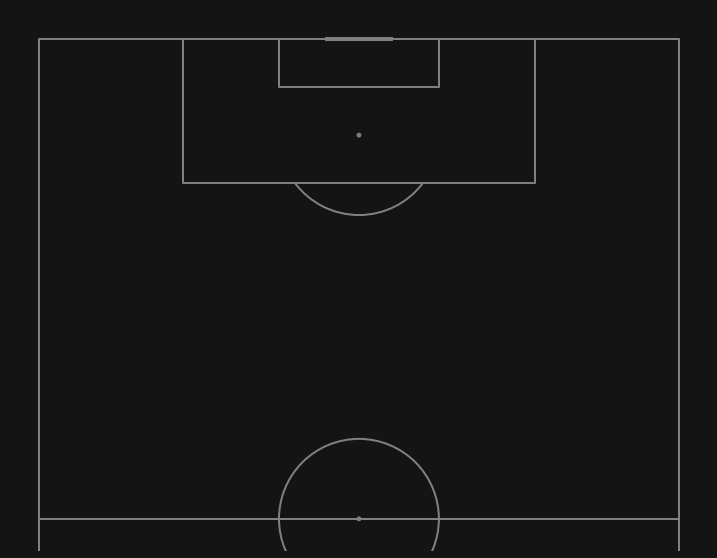

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))

bg = "#141414"

title_font = "Open Sans"
body_font = 'Calibri'

fig.set_facecolor(bg)
ax.patch.set_facecolor(bg)

# pitch = Pitch(pitch_type='statsbomb', orientation='vertical', view = 'half',
#               pitch_color=bg, line_color='grey', figsize=(16, 10),
#               constrained_layout=False, tight_layout=True)

pitch = VerticalPitch(half=True, pitch_type = 'statsbomb', 
                      pitch_color=bg, line_color='grey', figsize=(16, 10),
                      constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_xaxis()

size = np.sqrt(goal['xG'])*500
size1 = np.sqrt(others['xG'])*500

In [ ]:
ax.scatter(goal['X'], goal['Y'], s=size, alpha=0.7, color='#D00027', edgecolor='#C8102E', zorder=4, lw=2.2)
ax.scatter(others['X'], others['Y'], s=size1, alpha=0.45, color='grey', edgecolor='grey', zorder=3, lw=1.25)

ax.scatter(70,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(55,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(25,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)
ax.scatter(10,68, marker='h', s=8000, color=bg, edgecolor='grey', lw=2)

t1 = ax.text(70,66.5,'18',size=35, ha='center', color='#D00027',fontweight='bold', fontfamily=body_font, zorder=4)
t2 = ax.text(70,60,"Goals", size=27, ha='center', color='#D00027', fontweight='bold', fontfamily=body_font, zorder=4)

t3= ax.text(55,67,"16.02", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t4 = ax.text(55,60,"xG", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t5= ax.text(25,67,"111", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t6 = ax.text(25,60, "Shots", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

t7 = ax.text(10,67, "9/10", size=30, ha='center', color='white', fontweight='bold', fontfamily=body_font, zorder=4)
t8 = ax.text(10,60, "Penalties", size=25, ha='center', color='white', fontfamily=body_font, zorder=4)

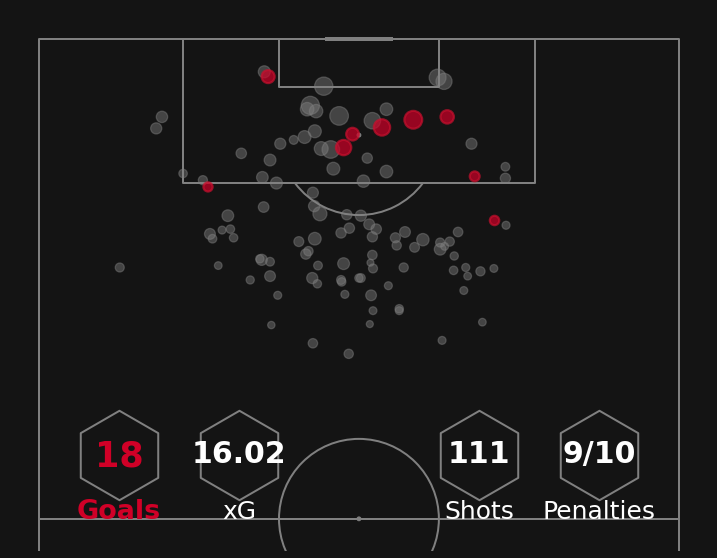

In [ ]:
fig

In [ ]:
t = ax.text(40,126, "Bruno Fernandes", size=36, ha='center', color='white', fontweight='bold',fontfamily=title_font, zorder=4)
t= ax.text(40,122.7, "Premier League | Season 2020-2021 | Shot Map", size=21, ha='center', color='white',fontfamily=body_font, zorder=4)

t9 = ax.text(70,54.5, "@statocastgaurav", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t10 = ax.text(8,56.5, "Data: understat", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)
t11 = ax.text(8,54, "Size represents xG value", color='grey', ha='center', size=18, fontfamily=body_font, zorder=4)

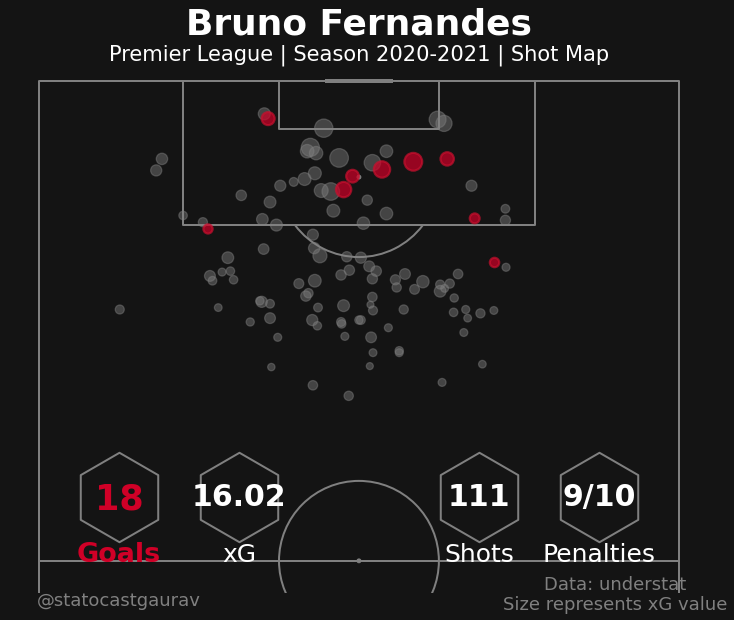

In [ ]:
fig